In [2]:
from sklearn.cluster import KMeans

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('C:/Users/Mansi Barthwal/Downloads/Mall.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df['Gender'].replace(['Male','Female'],[1,0],inplace=True) #Categorising the gender, 1 for Male,0 for Female

In [13]:
df.columns = ['CustomerID','Gender','Age','Annual_Income','Spending_Score']

In [14]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [15]:
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [16]:
df['Spending_Score'] = df['Spending_Score'].astype(float)

In [17]:
col_gender = df.loc[:,['Gender']]

In [18]:
col1 = df.loc[:,['Age']]

In [19]:
col2 = df.loc[:,['Annual_Income']]

In [20]:
col3 = df.loc[:,['Spending_Score']]

In [21]:
col2

,Annual_Income
0,15.0
1,15.0
2,16.0
3,16.0
4,17.0
...,...
195,120.0
196,126.0
197,126.0
198,137.0


In [22]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [25]:
Array = np.column_stack((col1,col2,col3,col_gender))

In [26]:
Array

array([[ 19.,  15.,  39.,   1.],
       [ 21.,  15.,  81.,   1.],
       [ 20.,  16.,   6.,   0.],
       [ 23.,  16.,  77.,   0.],
       [ 31.,  17.,  40.,   0.],
       [ 22.,  17.,  76.,   0.],
       [ 35.,  18.,   6.,   0.],
       [ 23.,  18.,  94.,   0.],
       [ 64.,  19.,   3.,   1.],
       [ 30.,  19.,  72.,   0.],
       [ 67.,  19.,  14.,   1.],
       [ 35.,  19.,  99.,   0.],
       [ 58.,  20.,  15.,   0.],
       [ 24.,  20.,  77.,   0.],
       [ 37.,  20.,  13.,   1.],
       [ 22.,  20.,  79.,   1.],
       [ 35.,  21.,  35.,   0.],
       [ 20.,  21.,  66.,   1.],
       [ 52.,  23.,  29.,   1.],
       [ 35.,  23.,  98.,   0.],
       [ 35.,  24.,  35.,   1.],
       [ 25.,  24.,  73.,   1.],
       [ 46.,  25.,   5.,   0.],
       [ 31.,  25.,  73.,   1.],
       [ 54.,  28.,  14.,   0.],
       [ 29.,  28.,  82.,   1.],
       [ 45.,  28.,  32.,   0.],
       [ 35.,  28.,  61.,   1.],
       [ 40.,  29.,  31.,   0.],
       [ 23.,  29.,  87.,   0.],
       [ 6

In [27]:
KM_Result = KMeans(n_clusters = 5).fit(Array)

In [28]:
clusters = KM_Result.cluster_centers_

In [29]:
clusters

array([[45.2173913 , 26.30434783, 20.91304348,  0.39130435],
       [43.08860759, 55.29113924, 49.56962025,  0.41772152],
       [25.52173913, 26.30434783, 78.56521739,  0.39130435],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [40.66666667, 87.75      , 17.58333333,  0.52777778]])

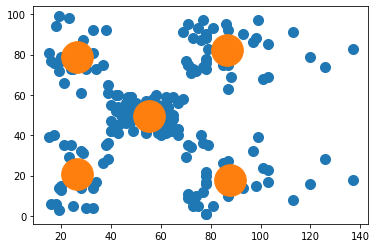

In [30]:
#Spending and Income
plt.scatter(col2,col3,s=100)
plt.scatter(clusters[:,1],clusters[:,2],s=1000)